In [13]:
from collections import defaultdict
import os, random
import xml.etree.ElementTree as ET
from pprint import pprint


In [4]:
join = os.path.join

PASCAL_DIR = '/root/pascal_voc/VOCdevkit/VOC2012/'
IMAGES_DIR = join(PASCAL_DIR, 'JPEGImages')
ANOT_DIR = join(PASCAL_DIR, 'Annotations')
IMAGE_SET_DIR = join(PASCAL_DIR, 'ImageSets')
LABELS_DIR = join(IMAGE_SET_DIR, 'Main')

In [9]:
label_count = defaultdict(int)
for x in [os.path.join(ANOT_DIR, i) for i in os.listdir(ANOT_DIR)]:
    tree = ET.parse(x)
    root = tree.getroot()
    file_name = root.find('filename').text
    file_path = os.path.join(IMAGES_DIR, file_name)
    ad = set()
    for child in root.findall('object'):
        category = child.find('name').text
        if category in ad:
            continue
        label_count[category]+=1
        ad.add(category)
pprint(label_count)

all_categories = label_count.keys()
pprint(all_categories)

defaultdict(<type 'int'>, {'sheep': 357, 'horse': 526, 'bicycle': 603, 'motorbike': 575, 'cow': 340, 'sofa': 742, 'aeroplane': 716, 'dog': 1341, 'cat': 1128, 'person': 9583, 'train': 589, 'boat': 549, 'bottle': 812, 'bus': 467, 'pottedplant': 613, 'tvmonitor': 645, 'chair': 1366, 'bird': 811, 'diningtable': 691, 'car': 1284})
['sheep',
 'horse',
 'bicycle',
 'motorbike',
 'cow',
 'sofa',
 'aeroplane',
 'dog',
 'cat',
 'person',
 'train',
 'boat',
 'bottle',
 'bus',
 'pottedplant',
 'tvmonitor',
 'chair',
 'bird',
 'diningtable',
 'car']


In [10]:
with open('categories.txt', 'w') as c:
    for i in all_categories:
        c.write('{}\n'.format(i))

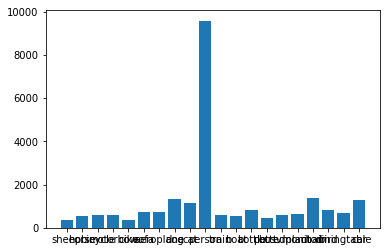

In [11]:
import matplotlib.pyplot as plt

D = label_count

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [14]:
def build_map(set_txt):
    set_dict = defaultdict(list)
    with open(set_txt) as t:
        for i in t:
            i = i.strip('\n')
            tree = ET.parse(os.path.join(ANOT_DIR, '{}.xml'.format(i)))
            root = tree.getroot()
            file_name = root.find('filename').text
            file_path = os.path.join(IMAGES_DIR, file_name)
            ad = set()
            for child in root.findall('object'):
                category = child.find('name').text
                if category in ad:
                    continue
                set_dict[file_path].append(category)
                ad.add(category)
    return set_dict

train_txt = os.path.join(IMAGE_SET_DIR, 'Main', 'train.txt')
val_txt = os.path.join(IMAGE_SET_DIR, 'Main', 'val.txt')
all_data_txt = os.path.join(IMAGE_SET_DIR, 'Main', 'trainval.txt')

all_data_map = build_map(all_data_txt)
all_data = all_data_map.items()
random.shuffle(all_data)

In [15]:
splindex = int(0.90*len(all_data))
train_map = dict(all_data[:splindex])
val_map = dict(all_data[splindex:])

In [19]:
covered_cats = set()
for key, vals in train_map.items():
    for v in vals:
        covered_cats.add(v)
        
print covered_cats - set(all_Ca)

/root/pascal_voc/VOCdevkit/VOC2012/JPEGImages/2010_003900.jpg


AssertionError: 

In [16]:
print len(train_map)
print len(val_map)

10386
1154


In [34]:
with open('train.json', 'w') as t_txt, open('val.json', 'w') as v_txt:
    json.dump(train_map, t_txt)
    json.dump(val_map, v_txt)